In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import nltk
from  nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import json
import seaborn as sns
import requests
import statsmodels.formula.api as smf
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/youssefamine/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [229]:
PATH = 'cmu/'
movies = pd.read_csv(PATH + 'movie.metadata.tsv', sep='\t', header=None)
movies.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres']
movies = movies.dropna(subset=['Movie box office revenue', 'Movie runtime', 'Movie release date'])


characters = pd.read_csv(PATH + 'character.metadata.tsv', sep='\t', header=None)
characters.columns = ['Wikipedia movie ID', 'Freebase movie ID','Movie release date', 'Character Name', 'Actor DOB', 'Actor gender', 'Actor height', 'Actor ethnicity', 'Actor Name', 'Actor age at movie release', 'Freebase character map', 'Freebase character ID', 'Freebase actor ID']

names = pd.read_csv(PATH + 'name.clusters.txt', sep='\t', header=None)
names.columns = ['Character Name', 'Freebase actor ID']

plot_summaries = pd.read_csv(PATH + 'plot_summaries.txt', sep='\t', header=None)
plot_summaries.columns = ['Wikipedia movie ID', 'Plot']

tvtropes = pd.read_csv(PATH + 'tvtropes.clusters.txt', sep='\t', header=None)
tvtropes.columns = ['Trope', 'Info']

In [270]:
titles = pd.read_csv(PATH + 'title.basics.tsv', sep='\t', header=0, low_memory=False)
titles = titles[titles['titleType'] == 'movie']
titles

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
...,...,...,...,...,...,...,...,...,...
11219431,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
11219458,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
11219470,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
11219480,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama


In [259]:
array = np.load(PATH + 'Dataset.npy')
array_imdb = np.zeros((array.shape[0], 4), dtype='U100')
n = array.shape[0]
for i in range(n):
    p = str(array[i])
    splitted = p.split(',')
    array_imdb[i, 0] = splitted[0]
    array_imdb[i, 1] = splitted[1]
    array_imdb[i, 2] = splitted[2]
    array_imdb[i, 3] = splitted[3]



In [271]:
df_imdb = pd.DataFrame(array_imdb, columns=['User ID', 'tconst', 'IMDB rating', 'IMDB votes'])
df_imdb

,User ID,tconst,IMDB rating,IMDB votes
0,ur4592644,tt0120884,10,16 January 2005
1,ur3174947,tt0118688,3,16 January 2005
2,ur3780035,tt0387887,8,16 January 2005
3,ur4592628,tt0346491,1,16 January 2005
4,ur3174947,tt0094721,8,16 January 2005
...,...,...,...,...
4669815,ur0581842,tt0107977,6,16 January 2005
4669816,ur3174947,tt0103776,8,16 January 2005
4669817,ur4592639,tt0107423,9,16 January 2005
4669818,ur4581944,tt0102614,8,16 January 2005


In [272]:
df_imdb.merge(titles, on='tconst', how='inner')

,User ID,tconst,IMDB rating,IMDB votes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,ur4592644,tt0120884,10,16 January 2005,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
1,ur3174947,tt0118688,3,16 January 2005,movie,Batman & Robin,Batman & Robin,0,1997,\N,125,"Action,Sci-Fi"
2,ur4592628,tt0346491,1,16 January 2005,movie,Alexander,Alexander,0,2004,\N,175,"Action,Biography,Drama"
3,ur3174947,tt0094721,8,16 January 2005,movie,Beetlejuice,Beetlejuice,0,1988,\N,92,"Comedy,Fantasy"
4,ur1162550,tt0114891,9,16 January 2005,movie,Man Wanted,Wong Gok dik tin hung,0,1995,\N,92,"Action,Crime,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...
3442949,ur3174947,tt0096895,8,16 January 2005,movie,Batman,Batman,0,1989,\N,126,"Action,Adventure"
3442950,ur0581842,tt0107977,6,16 January 2005,movie,Robin Hood: Men in Tights,Robin Hood: Men in Tights,0,1993,\N,104,"Adventure,Comedy,Musical"
3442951,ur3174947,tt0103776,8,16 January 2005,movie,Batman Returns,Batman Returns,0,1992,\N,126,"Action,Crime,Fantasy"
3442952,ur4581944,tt0102614,8,16 January 2005,movie,Out for Justice,Out for Justice,0,1991,\N,91,"Action,Crime,Drama"


In [184]:
movies_copy = movies.copy()
movies_copy['Movie genres'] = movies['Movie genres'].apply(lambda x: list(json.loads(x).values()))
movies_copy['Movie languages'] = movies['Movie languages'].apply(lambda x: list(json.loads(x).values()))
movies_copy['Movie countries'] = movies['Movie countries'].apply(lambda x: list(json.loads(x).values()))
movies_copy['Movie release date'] = movies['Movie release date'].apply(lambda x: int(x[0:4]))
movies_copy['Movie box office revenue'] = movies['Movie box office revenue'].apply(lambda x: float(x))
movies_copy['Movie runtime'] = movies['Movie runtime'].apply(lambda x: float(x))
movies_copy['len_Gen'] = movies_copy['Movie genres'].apply(lambda x: len(x))
movies_copy['len_countries'] = movies_copy['Movie countries'].apply(lambda x: len(x))
movies_copy['len_languages'] = movies_copy['Movie languages'].apply(lambda x: len(x))
movies_copy = movies_copy[(movies_copy['len_Gen'] >= 1) & (movies_copy['len_countries'] >= 1) & (movies_copy['len_languages'] >= 1)]
movies_copy = movies_copy.drop(columns=['len_Gen', 'len_countries', 'len_languages'])
movies_genres = movies_copy.explode('Movie genres')
movies_languages = movies_copy.explode('Movie languages')
movies_countries = movies_copy.explode('Movie countries')
movies_copy

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
13,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ..."
17,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ..."
21,612710,/m/02wjqm,New Rose Hotel,1999,21521.0,92.0,[English Language],[United States of America],"[Thriller, Science Fiction, Future noir, Indie..."
...,...,...,...,...,...,...,...,...,...
81677,6740261,/m/0glmbl,Eternally Yours,1939,683131.0,91.0,[English Language],[United States of America],"[Family Drama, Black-and-white, Drama, Comedy,..."
81694,1191380,/m/04f_y7,Wilde,1997,2158775.0,118.0,[English Language],"[Kingdom of Great Britain, Japan, England, Uni...","[LGBT, Biography, Japanese Movies, History, Ga..."
81695,54540,/m/0f7hw,Coming to America,1988,288752301.0,117.0,[English Language],[United States of America],"[Romantic comedy, Comedy of manners, Drama, Co..."
81720,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,[English Language],[United States of America],"[Alien Film, Science Fiction, Family Film, Com..."


In [230]:
box_office_by_genre = movies_genres.groupby('Movie genres')['Movie box office revenue'].agg('mean').reset_index()
box_office_by_genre

,Movie genres,Movie box office revenue
0,Absurdism,7.571945e+07
1,Acid western,6.412655e+05
2,Action,9.079592e+07
3,Action Comedy,8.569042e+07
4,Action Thrillers,1.134749e+08
...,...,...
305,Workplace Comedy,6.443332e+07
306,World History,3.194810e+05
307,World cinema,1.870189e+07
308,Wuxia,8.764117e+07


<Axes: xlabel='Movie genres', ylabel='Movie box office revenue'>

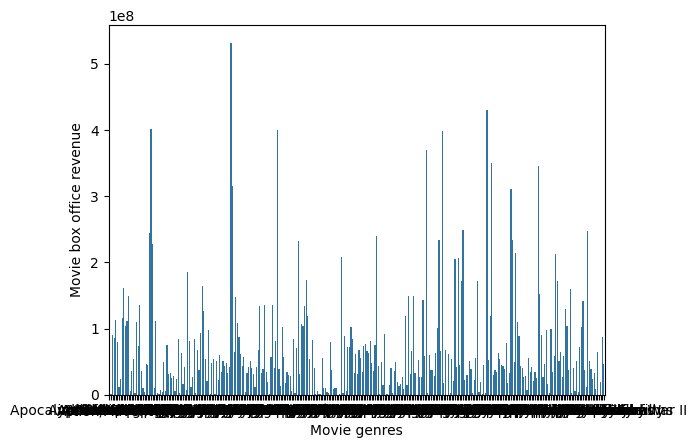

In [121]:
sns.barplot(x='Movie genres', y='Movie box office revenue', data=box_office_by_genre)

In [187]:
box_office_by_language = movies_languages.groupby('Movie languages')['Movie box office revenue'].agg('mean').reset_index()
box_office_by_language

,Movie languages,Movie box office revenue
0,Aboriginal Malay languages,1.629449e+08
1,Afrikaans Language,1.023347e+08
2,Albanian language,1.455435e+08
3,Algonquin Language,3.053601e+07
4,American English,3.316171e+07
...,...,...
138,Wolof Language,1.298727e+07
139,Xhosa Language,2.506511e+08
140,Yiddish Language,3.398626e+07
141,Zulu Language,2.428868e+08


In [165]:
def search(langs, simple_langs):
    for lang in simple_langs:
        if lang[0] in langs:
            return lang[0]
    return langs

In [164]:
def filter(langs):
    if 'sign' in langs:
        return langs
    if 'language' in langs:
        langs.remove('language')
    return langs

In [173]:
def flatten(x):
    if isinstance(x, list):
        return " ".join(x)
    return x

In [206]:
def extract_languages(langs):
    langs = langs.apply(lambda x: x.lower().split())
    langs = langs.apply(lambda x: filter(x))
    unique = langs[langs.apply(lambda x: len(x) == 1)]
    langs = langs.apply(lambda x: search(x, unique))
    langs = langs.apply(lambda x: flatten(x))
    return langs

In [ ]:
def clean_genres(genres):
    genres = genres.apply(lambda x: x.lower().split())
    genres = genres.apply(lambda x: filter(x))
    return genres

In [221]:
langs = extract_languages(movies_languages['Movie languages'])
movies_languages['Movie languages'] = langs
box_office_by_language = movies_languages.groupby(['Movie languages','Movie release date'])['Movie box office revenue'].agg('mean').reset_index()
r = box_office_by_language.sort_values(by='Movie box office revenue', ascending=False)
r

,Movie languages,Movie release date,Movie box office revenue
1007,swedish,1997,1.224646e+09
1119,zulu,1994,9.515838e+08
1097,xhosa,1994,9.515838e+08
989,swahili,1994,9.515838e+08
128,chinese,2004,7.837663e+08
...,...,...,...
1120,zulu,2003,3.165100e+04
2,afrikaans,2003,3.165100e+04
725,papiamento,1999,3.047100e+04
114,chechen,2005,1.931700e+04


<Axes: xlabel='Movie release date', ylabel='Movie box office revenue'>

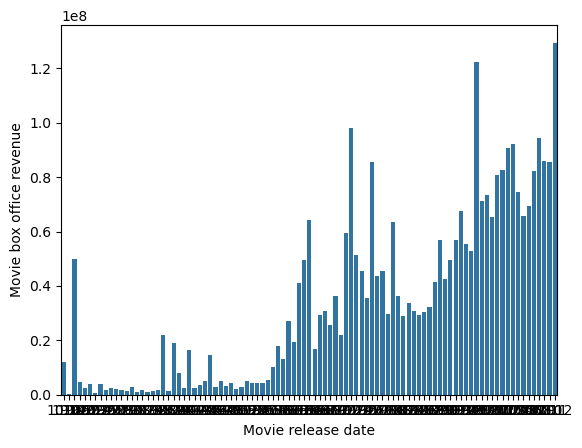

In [220]:
sns.barplot(x='Movie release date', y='Movie box office revenue', data=box_office_by_language)